In [57]:
import cv2
from matplotlib import pyplot as plt
import random
from skimage.util import invert
import numpy as np
from scipy.interpolate import lagrange
import math

In [58]:
def Bezier(A, con, B, t):    
    return (1-t)**2 * A + 2*t*(1-t) * con + t**2 * B

def circle(p):
    x = p[0]
    y = p[1]
    cv2.circle(img, (int(y), int(x)), 5, (255, 0, 0), -1)

def slope(A, B):
    return (A[1] - B[1]) / (A[0] - B[0])

def dis(A, B):
    return math.sqrt((A[0] - B[0]) ** 2 + (A[1] - B[1]) ** 2)

[ 82 160] [ 71 113]


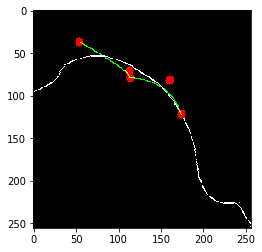

In [28]:
size = 256

img = (cv2.imread("river_skel.png"))

ori = []
for x in range(256):
    for y in range(256):
        if img[x][y][0] == 255:
            ori.append(np.array([x, y]))

random.shuffle(ori)
circle(B)
circle(mid)

con1 = np.array([random.randrange(int(mid[0]),int(A[0])), random.randrange(int(mid[1]),int(A[1]))])
con2 = np.array([random.randrange(int(B[0]), int(mid[0])), random.randrange(int(B[1]), int(mid[1]))])

print(con1, con2)
circle(con1)
circle(con2)

for t in np.linspace(0, 1, 10000):
    tmp1 = Bezier(A, con1, mid, t)
    img[int(tmp1[0])][int(tmp1[1])][1] =  255
    

for t in np.linspace(0, 1, 10000):
    tmp2 = Bezier(mid, con2, B, t)
    img[int(tmp2[0])][int(tmp2[1])][1] =  255
    
    
plt.imshow(img)

0.05235987755982989
0.3333333333333333 0.2761022520879665
155.76905982896602
155.502411556863
154.80633061990713
154.53802121160993
153.57408635573907
153.3101431738944
152.6106156202772
152.34500319997372
151.64761785138597
151.38031576133008
150.68510211696443
150.41608956491322
149.45233353815524
149.18780110987626
148.48905683584903
148.22280526288793
147.52626884728022
147.2582765076381
146.2942240828393
146.03081866510234
145.33065746772084
145.06550244630873
144.3675863897433
144.10065926289164
143.40502083260543
143.13629868066312
142.1724305201258
141.90842117365693
141.20906486483082
140.9432509913121
140.24621207005913
139.97856978837868
139.01438774457844
138.7515765676196
138.0507153186828
137.78606605894515
137.0875632579411
136.82105101189657
136.12494260788506
135.85654198455074
134.892549831338
134.6291201783626
133.9290857132983
133.6637572418193
132.9661611087573
132.69890730522238
132.00378782444085
131.73458164050928
130.77079184588584
130.50670480860362
129.807549

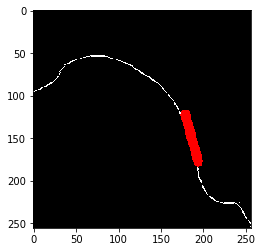

In [88]:
img = (cv2.imread("river_skel.png"))
ori = []
the =  3 * (2*np.pi / 360)
print(the)
r = 30
for x in range(256):
    for y in range(256):
        if img[x][y][0] == 255:
            ori.append(np.array([x, y]))

index = random.randrange(len(ori))
A1 = ori[index]
A2 = ori[index+10]
circle(A1)
circle(A2)
m1 = slope(A1, A2)
m2 = (m1 - np.tan(the)) / (np.tan(the) * m1 + 1)
b = A1[1] - m2 * A1[0]

print(m1, m2)

for x in range(size):
    for y in range(size):
        if y <= m2 * x + b + 1 and y >= m2 * x + b - 1:
            print(dis(A1, np.array([x, y])))
            if dis(A1, np.array([x, y])) < r:
                print("test")
                circle(np.array([x, y]))
plt.imshow(img)